In [2]:
import os

def parse(fname, proc):
    with open(fname, 'r', encoding = 'utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            nums = list(map(int, line.split(', ')))
            proc(nums)

t3_exists = set()
def proc3(ns):
    t3_exists.add(tuple(ns[:2]))
parse('C:/Users/esultano/Downloads/cpp_solutions.3.2097152.1.2097152.csv', proc3)

with open('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv', 'w', encoding = 'ascii') as f:
    cnt = 0
    def proc2(ns):
        global cnt
        flag = int(tuple(ns[:2]) in t3_exists)
        f.write(f'{ns[0]}, {ns[1]}, {flag}\n')
        if cnt % 500_000 == 0:
            print(round((os.path.getsize('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv') - cnt * 3) /
                os.path.getsize('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.csv') * 100, 1), '%, ', sep = '', end = '', flush = True)
        cnt += 1
    parse('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.csv', proc2)

0.0%, 4.9%, 10.0%, 15.5%, 21.1%, 26.6%, 32.2%, 37.7%, 43.3%, 48.9%, 54.5%, 60.2%, 65.9%, 71.8%, 77.9%, 84.0%, 90.2%, 96.3%, 

In [5]:
import pandas as pd

df = pd.read_csv('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv')
df.head()

,3,5,0
0,4,5,0
1,5,13,0
2,6,10,0
3,7,25,0
4,8,10,0


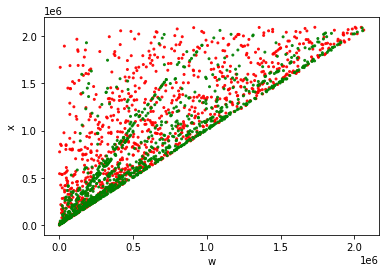

In [18]:
import matplotlib.pyplot as plt

df_plot = df.groupby(df.iloc[:,2]).sample(n=1000, random_state=1)
x = df_plot.iloc[:,0].to_numpy()
y = df_plot.iloc[:,1].to_numpy()
colors = df.iloc[:,2]
color_map = {0:'red', 1:'green'}

f = plt.figure()
plt.scatter(x, y, s=4, alpha=0.9, c=df_plot.iloc[:,2].map(color_map))
plt.xlabel("w")
plt.ylabel("x")
plt.savefig('C:/Users/esultano/Downloads/pairs.png')  
plt.show()